In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import pylab as plot

In [3]:
df = pd.read_csv("pollution_us_2000_2016.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
states = df['State'].unique()
states

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Country Of Mexico', 'Arkansas', 'Oregon', 'Wyoming',
       'North Dakota', 'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii',
       'Minnesota', 'New Mexico', 'Rhode Island', 'South Dakota', 'Utah',
       'Alabama', 'Washington', 'Alaska'], dtype=object)

In [7]:
len(states)

47

In [8]:
df['Date Local'] = pd.to_datetime(df['Date Local'])
df = df.set_index('Date Local')

In [9]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [10]:
drop_cols = ['State Code', 'County Code', 'Site Num', 'Address', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']

In [11]:
df.shape

(1746661, 27)

In [12]:
df.drop(drop_cols, axis = 1, inplace=True)
df.head()

,State,County,City,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
Date Local,,,,,,,,,,,
2000-01-01,Arizona,Maricopa,Phoenix,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,3.000000,Parts per million,1.145833
2000-01-01,Arizona,Maricopa,Phoenix,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,3.000000,Parts per million,0.878947
2000-01-01,Arizona,Maricopa,Phoenix,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,2.975000,Parts per million,1.145833
2000-01-01,Arizona,Maricopa,Phoenix,Parts per billion,19.041667,Parts per million,0.022500,Parts per billion,2.975000,Parts per million,0.878947
2000-01-02,Arizona,Maricopa,Phoenix,Parts per billion,22.958333,Parts per million,0.013375,Parts per billion,1.958333,Parts per million,0.850000


In [13]:
df['NO2 Units'].unique()

array(['Parts per billion'], dtype=object)

In [14]:
df['SO2 Units'].unique()

array(['Parts per billion'], dtype=object)

In [15]:
df['O3 Units'].unique()

array(['Parts per million'], dtype=object)

In [16]:
df['CO Units'].unique()

array(['Parts per million'], dtype=object)

In [17]:
df['NO2 Mean'] = df['NO2 Mean']/1000
df['SO2 Mean'] = df['SO2 Mean']/1000

In [18]:
remove_unit_cols = ['NO2 Units', 'SO2 Units', 'O3 Units', 'CO Units']
df.drop(remove_unit_cols, axis=1, inplace=True)
df.head()

,State,County,City,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
Date Local,,,,,,,
2000-01-01,Arizona,Maricopa,Phoenix,0.019042,0.022500,0.003000,1.145833
2000-01-01,Arizona,Maricopa,Phoenix,0.019042,0.022500,0.003000,0.878947
2000-01-01,Arizona,Maricopa,Phoenix,0.019042,0.022500,0.002975,1.145833
2000-01-01,Arizona,Maricopa,Phoenix,0.019042,0.022500,0.002975,0.878947
2000-01-02,Arizona,Maricopa,Phoenix,0.022958,0.013375,0.001958,0.850000


In [19]:
df.isna().sum()

State       0
County      0
City        0
NO2 Mean    0
O3 Mean     0
SO2 Mean    0
CO Mean     0
dtype: int64

In [20]:
df['Total Mean'] = df['NO2 Mean'] + df['SO2 Mean'] + df['CO Mean']

In [21]:
df.head()

,State,County,City,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,Total Mean
Date Local,,,,,,,,
2000-01-01,Arizona,Maricopa,Phoenix,0.019042,0.022500,0.003000,1.145833,1.167875
2000-01-01,Arizona,Maricopa,Phoenix,0.019042,0.022500,0.003000,0.878947,0.900989
2000-01-01,Arizona,Maricopa,Phoenix,0.019042,0.022500,0.002975,1.145833,1.167850
2000-01-01,Arizona,Maricopa,Phoenix,0.019042,0.022500,0.002975,0.878947,0.900964
2000-01-02,Arizona,Maricopa,Phoenix,0.022958,0.013375,0.001958,0.850000,0.874917


In [22]:
def get_df(gas_name):
    global df
    df_year_list = [df.loc[str(i)] for i in range(2000, 2017)]
    
    dict_of_lists = {state:[] for state in states}
    for df_year in df_year_list:
        for state in states:
            state_vals = df_year[df_year['State'] == state]
            dict_of_lists[state].append(state_vals[gas_name].mean())
    result = pd.DataFrame(dict_of_lists)
    
    # change the indices so that they reflect years
    index_list = [item for item in range(2000, 2017)]
    result.index = index_list
    
    # get only the columns for which one has non-NaN values.
    result.dropna(axis = 1, inplace=True)
    return result

In [23]:
no2_df = get_df('NO2 Mean')
no2_df

,Arizona,California,Colorado,District Of Columbia,Florida,Illinois,Indiana,Kansas,Louisiana,New York,North Carolina,Oklahoma,Pennsylvania,Texas
2000,0.026488,0.017581,0.014902,0.022726,0.012453,0.026437,0.015288,0.009704,0.017346,0.023167,0.015173,0.004771,0.016131,0.016347
2001,0.022745,0.017761,0.025783,0.024474,0.012388,0.022357,0.014948,0.010595,0.017359,0.025032,0.013854,0.008272,0.015966,0.016241
2002,0.023665,0.016755,0.019769,0.024441,0.011314,0.019854,0.016393,0.008776,0.018008,0.023964,0.012266,0.006610,0.014585,0.016094
2003,0.023101,0.015795,0.021073,0.022641,0.010930,0.020684,0.014523,0.009623,0.015563,0.022882,0.011956,0.006296,0.014061,0.015610
2004,0.020134,0.015151,0.021645,0.020956,0.009516,0.018814,0.013781,0.009540,0.015816,0.020890,0.010630,0.005397,0.013627,0.013786
2005,0.021360,0.013966,0.024177,0.020837,0.008644,0.017899,0.013231,0.010950,0.014400,0.021336,0.012434,0.008135,0.013449,0.013879
2006,0.020835,0.014016,0.024645,0.015967,0.008520,0.017392,0.013923,0.011178,0.014992,0.019239,0.012285,0.007873,0.012460,0.013524
2007,0.019330,0.013076,0.023835,0.015332,0.006136,0.014502,0.010994,0.013394,0.015199,0.018541,0.013916,0.007787,0.012142,0.013107
2008,0.018251,0.012977,0.019081,0.018058,0.005214,0.014086,0.009289,0.016808,0.013101,0.016704,0.011208,0.006231,0.011102,0.010625
2009,0.017156,0.012873,0.014231,0.018303,0.006028,0.013417,0.010136,0.012272,0.012875,0.012977,0.009852,0.006455,0.010652,0.008671


In [24]:
o3_df = get_df('O3 Mean')
o3_df

,Arizona,California,Colorado,District Of Columbia,Florida,Illinois,Indiana,Kansas,Louisiana,New York,North Carolina,Oklahoma,Pennsylvania,Texas
2000,0.023655,0.023675,0.017066,0.017567,0.026261,0.017105,0.029782,0.029726,0.023756,0.021252,0.034652,0.037325,0.024541,0.024590
2001,0.021628,0.024844,0.016376,0.020936,0.024162,0.020866,0.032153,0.027978,0.022978,0.020936,0.033747,0.034316,0.027188,0.025967
2002,0.022803,0.026342,0.020604,0.024150,0.023168,0.021778,0.035506,0.027316,0.021038,0.022017,0.037135,0.031259,0.028254,0.028803
2003,0.022508,0.025648,0.019414,0.019372,0.023417,0.020923,0.029897,0.027760,0.020969,0.021158,0.030766,0.035488,0.025347,0.027018
2004,0.022614,0.025979,0.017202,0.019498,0.025964,0.020636,0.030380,0.024331,0.022232,0.021117,0.030785,0.032470,0.024407,0.024734
2005,0.023738,0.025119,0.018818,0.021644,0.027014,0.024536,0.032807,0.026171,0.025390,0.022630,0.032039,0.033963,0.027749,0.027122
2006,0.025204,0.026274,0.020494,0.026704,0.029191,0.021144,0.024200,0.027627,0.022960,0.023701,0.032401,0.030523,0.027407,0.025674
2007,0.024247,0.026670,0.021692,0.028556,0.028464,0.023437,0.031857,0.023232,0.022393,0.023020,0.029454,0.026174,0.028704,0.024283
2008,0.025574,0.026976,0.025609,0.026468,0.027828,0.021670,0.028750,0.022086,0.021695,0.024348,0.028049,0.026592,0.027024,0.024720
2009,0.025385,0.026157,0.026783,0.023656,0.028474,0.020628,0.025930,0.023496,0.022425,0.025203,0.025921,0.028389,0.025312,0.023981


In [25]:
so2_df = get_df('SO2 Mean')
so2_df

,Arizona,California,Colorado,District Of Columbia,Florida,Illinois,Indiana,Kansas,Louisiana,New York,North Carolina,Oklahoma,Pennsylvania,Texas
2000,0.002303,0.001721,0.002138,0.008138,0.001974,0.006064,0.007351,0.000943,0.003659,0.007182,0.003661,0.000852,0.005155,0.002726
2001,0.001667,0.001814,0.002438,0.006651,0.001148,0.005480,0.003314,0.000993,0.003692,0.007796,0.003280,0.001004,0.005269,0.001727
2002,0.001874,0.001626,0.002247,0.006713,0.000662,0.004179,0.003512,0.001563,0.002613,0.006823,0.002736,0.001016,0.005051,0.000361
2003,0.001800,0.001495,0.001963,0.008323,0.000656,0.005028,0.003391,0.001796,0.003362,0.007447,0.002890,0.001050,0.004914,0.002037
2004,0.001626,0.001828,0.001899,0.006475,0.000648,0.004125,0.004726,0.002095,0.003460,0.006998,0.002370,0.000909,0.004592,0.002010
2005,0.001845,0.001653,0.001930,0.004484,0.000520,0.004829,0.004767,0.002211,0.003767,0.007352,0.002156,0.000413,0.005491,0.002270
2006,0.001689,0.001383,0.002085,0.004525,0.000391,0.002712,0.009934,0.003291,0.003438,0.004699,0.002658,0.001907,0.005003,0.001848
2007,0.001520,0.001216,0.001919,0.005021,0.000659,0.001663,0.003399,0.004196,0.002575,0.004960,0.002940,0.000654,0.005171,0.001248
2008,0.001457,0.001095,0.001860,0.005556,0.000551,0.001583,0.002465,0.004044,0.002396,0.004549,0.002070,0.000592,0.003979,0.000773
2009,0.001176,0.001007,0.001371,0.004529,0.000121,0.001440,0.001543,0.004652,0.001913,0.003345,0.000802,0.000654,0.003545,0.000668


In [26]:
co_df = get_df('CO Mean')
co_df

,Arizona,California,Colorado,District Of Columbia,Florida,Illinois,Indiana,Kansas,Louisiana,New York,North Carolina,Oklahoma,Pennsylvania,Texas
2000,0.745756,0.644488,0.611388,1.175696,0.725072,0.702893,0.872974,0.754412,0.756646,0.462469,0.618248,0.047977,0.302550,0.436668
2001,0.649472,0.622149,0.627563,1.075424,0.638525,0.591790,0.382713,0.334625,0.825789,0.493436,0.539908,0.033368,0.320831,0.384691
2002,0.705928,0.601791,0.499262,1.158795,0.471433,0.590667,0.444146,0.392605,0.715798,0.441820,0.432545,0.060068,0.260632,0.340582
2003,0.632011,0.575379,0.549692,0.896370,0.441272,0.512715,0.442218,0.315825,0.661954,0.529578,0.485786,0.042237,0.266114,0.460083
2004,0.509960,0.517947,0.616847,0.617589,0.520814,0.577741,0.564829,0.381378,0.561826,0.436545,0.429905,0.015515,0.326305,0.343802
2005,0.618088,0.459535,0.617500,0.848892,0.564062,0.456603,0.422176,0.383880,0.470699,0.399690,0.517736,0.016907,0.213495,0.314723
2006,0.555681,0.444421,0.571693,1.115848,0.389185,0.371336,0.656321,0.375922,0.371685,0.319387,0.403574,0.112292,0.231311,0.262154
2007,0.508593,0.416035,0.549441,1.196905,0.284006,0.326551,0.448705,0.422214,0.381694,0.366200,0.375289,0.207000,0.238084,0.229212
2008,0.425363,0.390693,0.405501,1.221562,0.223521,0.275450,0.419633,0.402355,0.283272,0.315405,0.322851,0.152388,0.184915,0.224069
2009,0.422903,0.394015,0.355386,0.865725,0.337613,0.265658,0.233750,0.296209,0.221387,0.240139,0.293876,0.218559,0.235364,0.200133


In [27]:
total_df = get_df('Total Mean')
total_df

,Arizona,California,Colorado,District Of Columbia,Florida,Illinois,Indiana,Kansas,Louisiana,New York,North Carolina,Oklahoma,Pennsylvania,Texas
2000,0.774547,0.663790,0.628428,1.206559,0.739499,0.735395,0.895613,0.765059,0.777651,0.492819,0.637081,0.053600,0.323835,0.455741
2001,0.673883,0.641723,0.655784,1.106550,0.652061,0.619626,0.400975,0.346213,0.846840,0.526263,0.557042,0.042644,0.342066,0.402660
2002,0.731467,0.620172,0.521278,1.189949,0.483409,0.614699,0.464051,0.402944,0.736418,0.472608,0.447547,0.067694,0.280268,0.357037
2003,0.656912,0.592668,0.572728,0.927334,0.452858,0.538427,0.460132,0.327244,0.680879,0.559907,0.500632,0.049583,0.285089,0.477729
2004,0.531721,0.534926,0.640391,0.645020,0.530979,0.600680,0.583335,0.393014,0.581102,0.464433,0.442905,0.021822,0.344524,0.359598
2005,0.641293,0.475154,0.643607,0.874212,0.573225,0.479331,0.440173,0.397041,0.488865,0.428377,0.532325,0.025454,0.232435,0.330872
2006,0.578205,0.459820,0.598422,1.136340,0.398095,0.391440,0.680177,0.390392,0.390114,0.343325,0.418517,0.122072,0.248774,0.277526
2007,0.529443,0.430328,0.575196,1.217258,0.290802,0.342715,0.463098,0.439804,0.399468,0.389701,0.392146,0.215441,0.255396,0.243567
2008,0.445071,0.404766,0.426442,1.245177,0.229287,0.291119,0.431387,0.423207,0.298769,0.336658,0.336130,0.159211,0.199997,0.235467
2009,0.441236,0.407895,0.370988,0.888557,0.343762,0.280515,0.245428,0.313133,0.236176,0.256461,0.304530,0.225667,0.249560,0.209472


In [28]:
std_dict = {col:total_df[col].std() for col in total_df.columns}

In [29]:
sorted_dict = sorted(std_dict.items(), key=lambda kv: kv[1])

In [30]:
sorted_dict

[('Pennsylvania', 0.06253747152711238),
 ('Oklahoma', 0.08783992387381194),
 ('New York', 0.09334925621827034),
 ('Texas', 0.09524291124389535),
 ('California', 0.11222648886089827),
 ('North Carolina', 0.11388815275143968),
 ('Kansas', 0.11671491116045096),
 ('Colorado', 0.12147815755276889),
 ('Florida', 0.13334867663131636),
 ('Arizona', 0.14094525399895025),
 ('Illinois', 0.1451514888594096),
 ('Indiana', 0.19892372530881805),
 ('Louisiana', 0.2210846303686895),
 ('District Of Columbia', 0.3471942671892196)]

In [31]:
params = {'legend.fontsize': 23,
          'legend.handlelength': 2,
         'font.size': 27}
plot.rcParams.update(params)

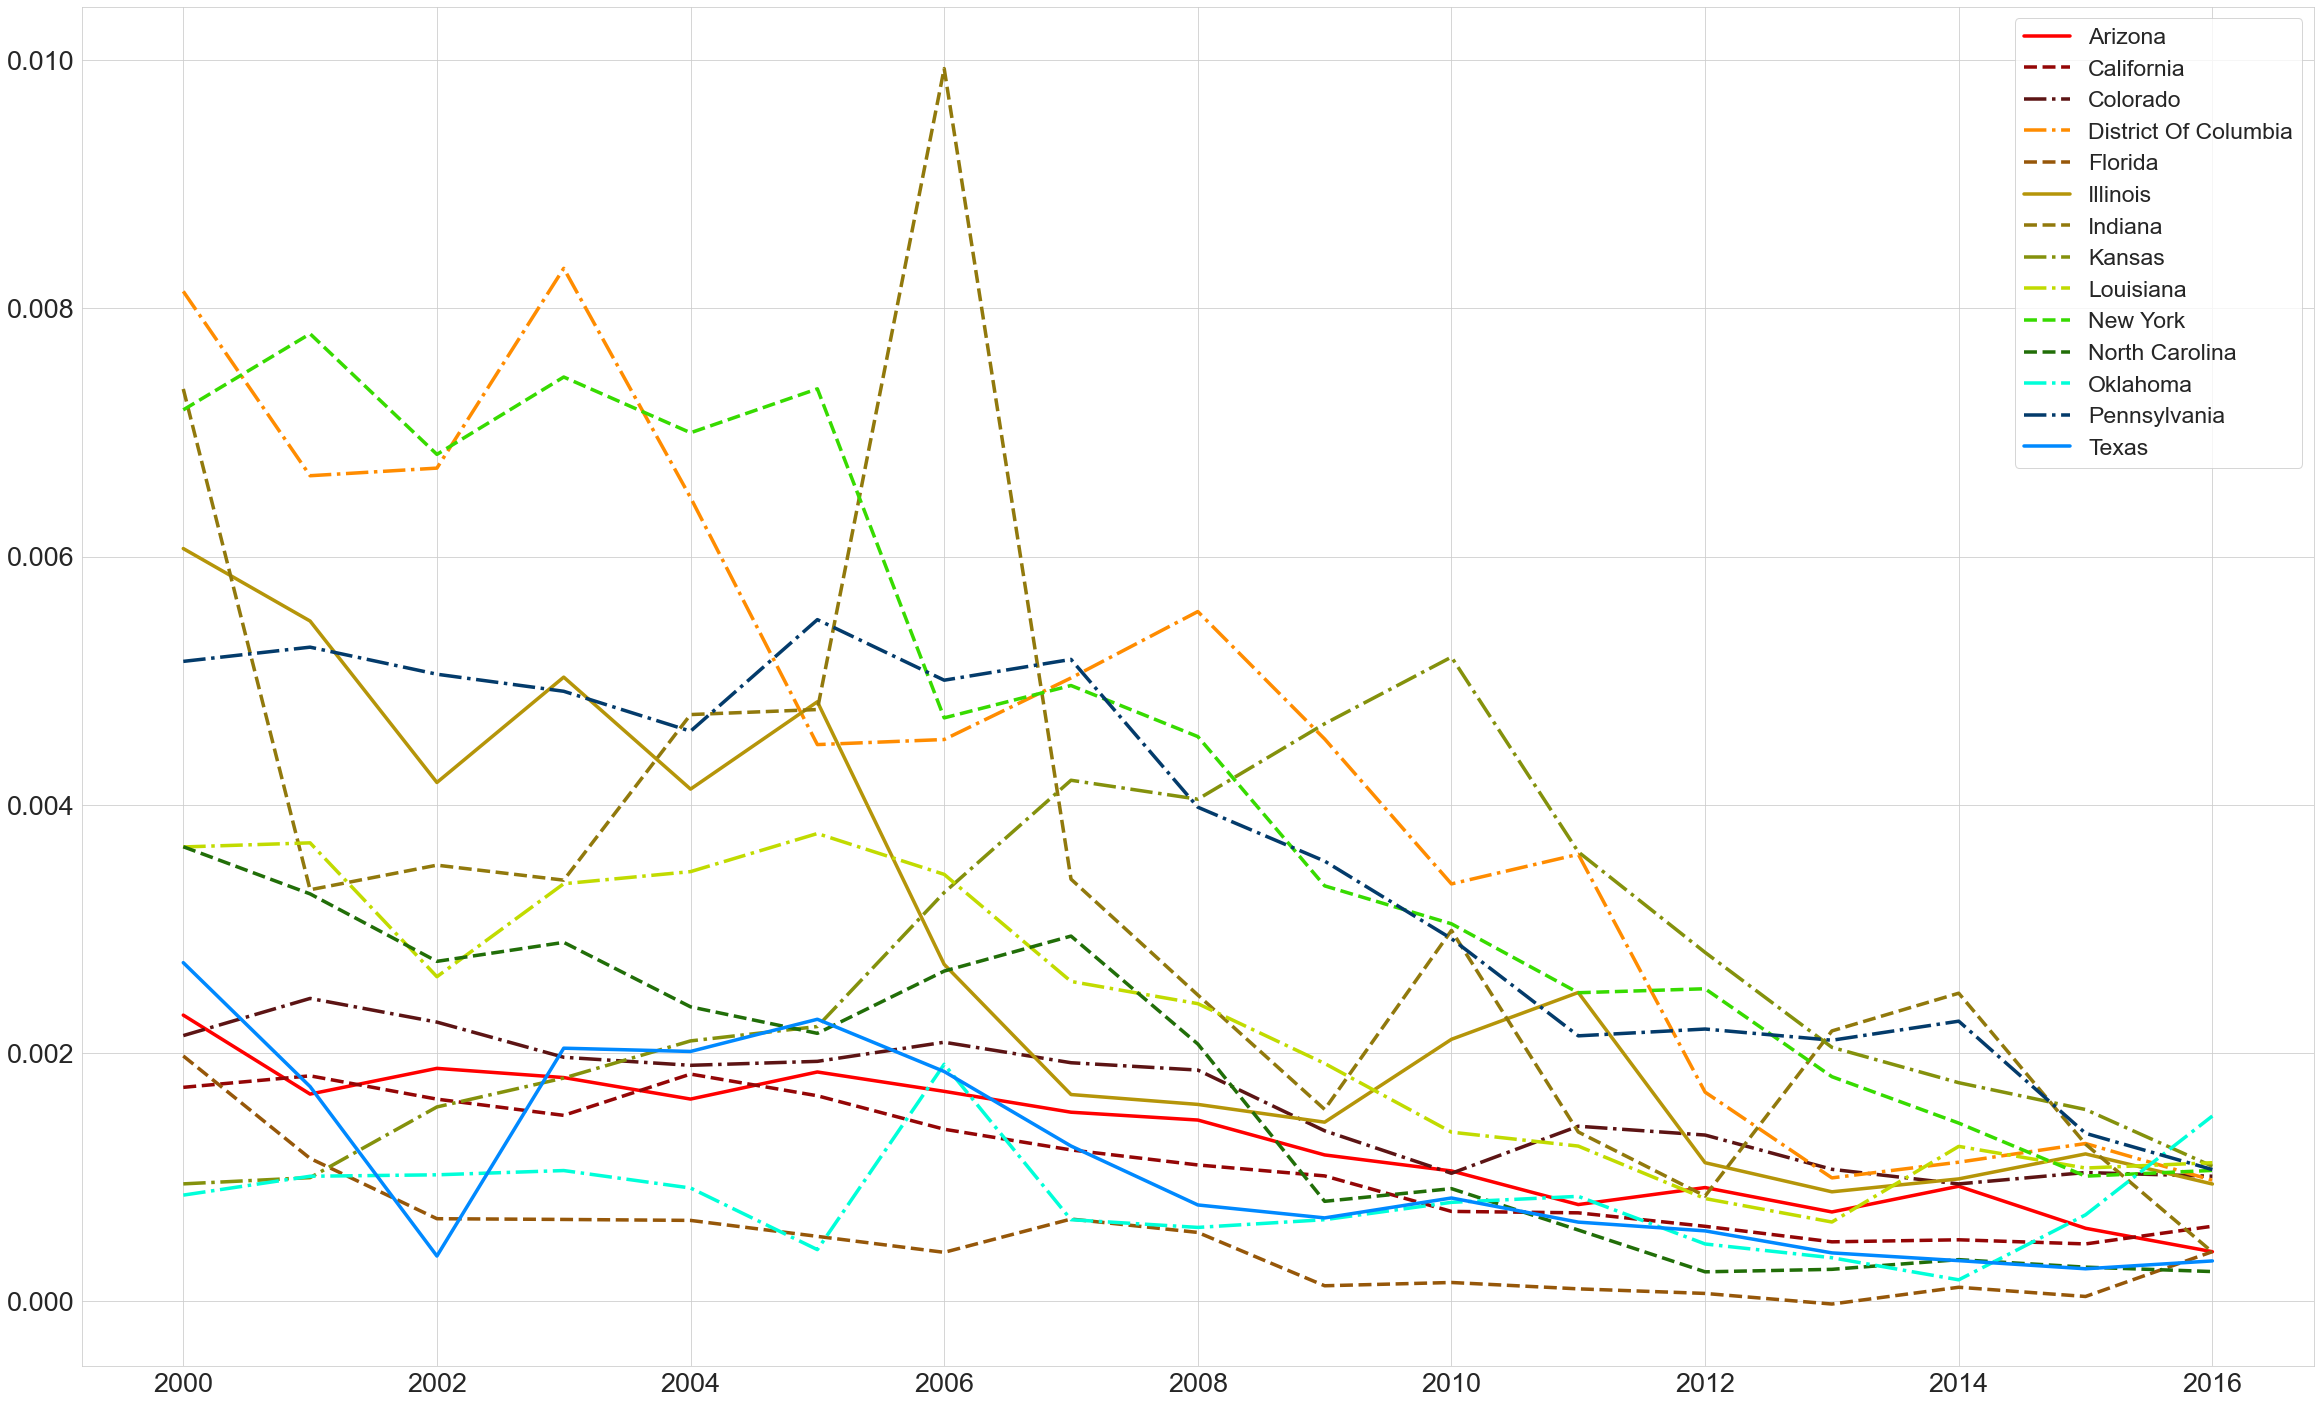

In [32]:
# SO2
sns.set_style("whitegrid")
plot_colors = ['#ff0000', '#940606', '#5c1414', '#ff8c00', '#965709', '#b59509', '#91790c', '#84910c', '#c1db00', '#37db00', '#216e08', '#00ffd9', '#033b6b', '#0089ff']
plot_line_styles = ['-', '--','-.', '-.', '--', '-', '--','-.', '-.', '--', '--','-.', '-.', '-']
so2_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)


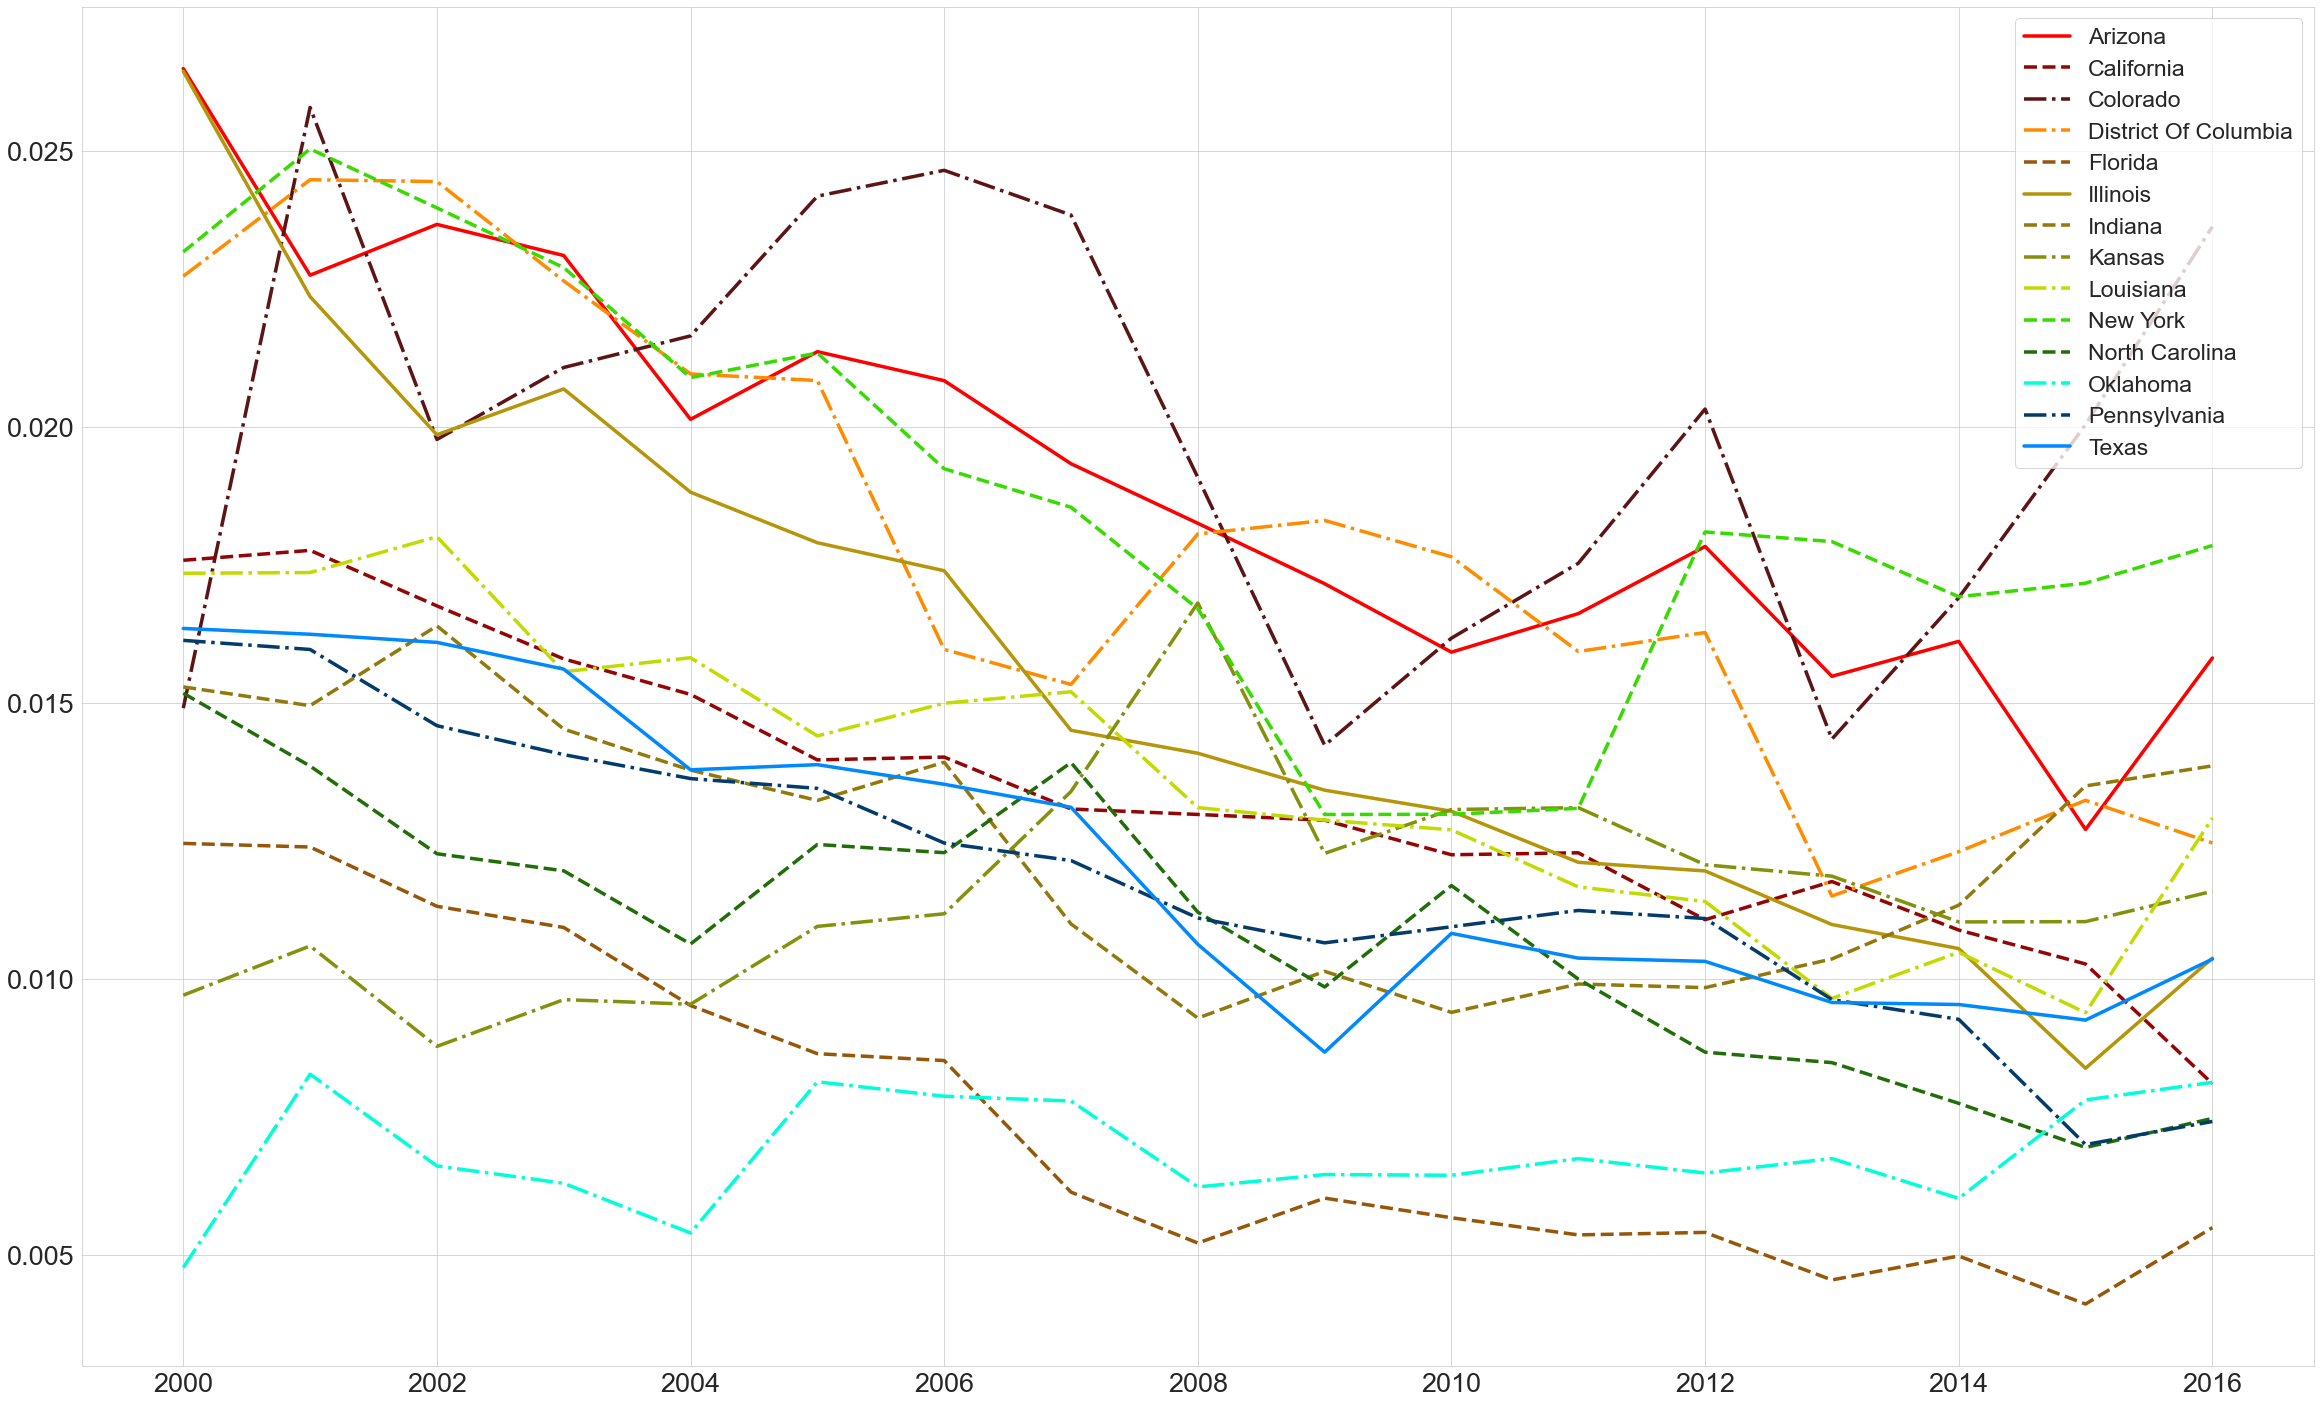

In [33]:
# NO2
sns.set_style("whitegrid")
plot_colors = ['#ff0000', '#940606', '#5c1414', '#ff8c00', '#965709', '#b59509', '#91790c', '#84910c', '#c1db00', '#37db00', '#216e08', '#00ffd9', '#033b6b', '#0089ff']
plot_line_styles = ['-', '--','-.', '-.', '--', '-', '--','-.', '-.', '--', '--','-.', '-.', '-']
no2_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)


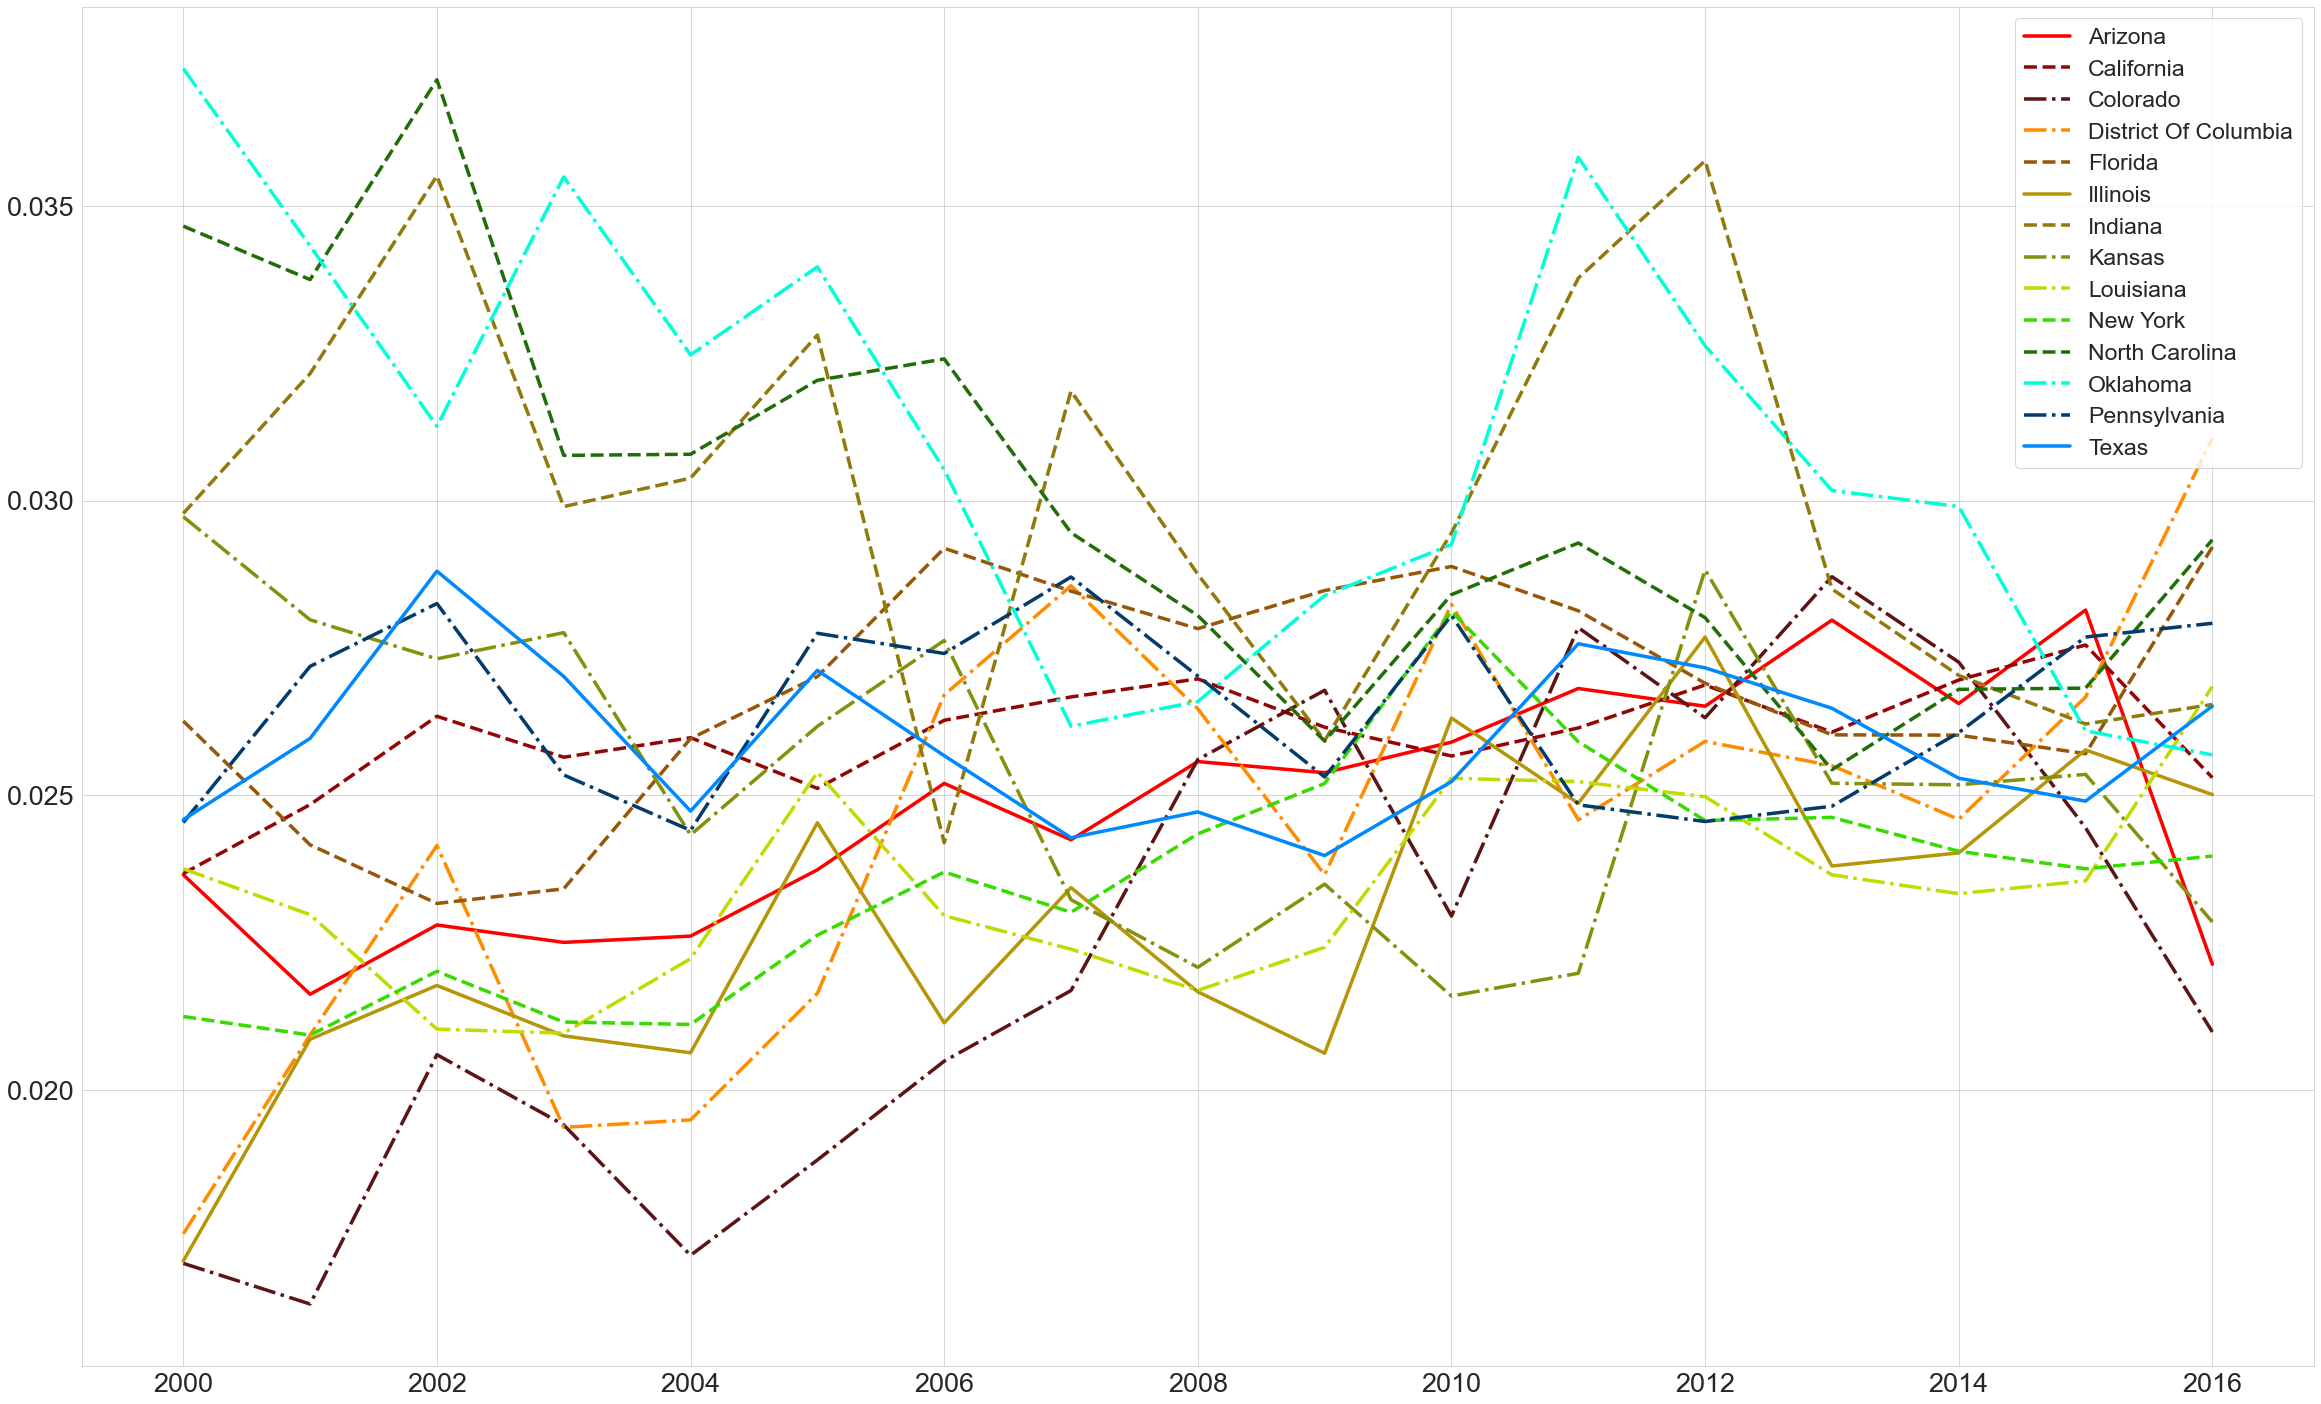

In [34]:
# O3
sns.set_style("whitegrid")
plot_colors = ['#ff0000', '#940606', '#5c1414', '#ff8c00', '#965709', '#b59509', '#91790c', '#84910c', '#c1db00', '#37db00', '#216e08', '#00ffd9', '#033b6b', '#0089ff']
plot_line_styles = ['-', '--','-.', '-.', '--', '-', '--','-.', '-.', '--', '--','-.', '-.', '-']
o3_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)

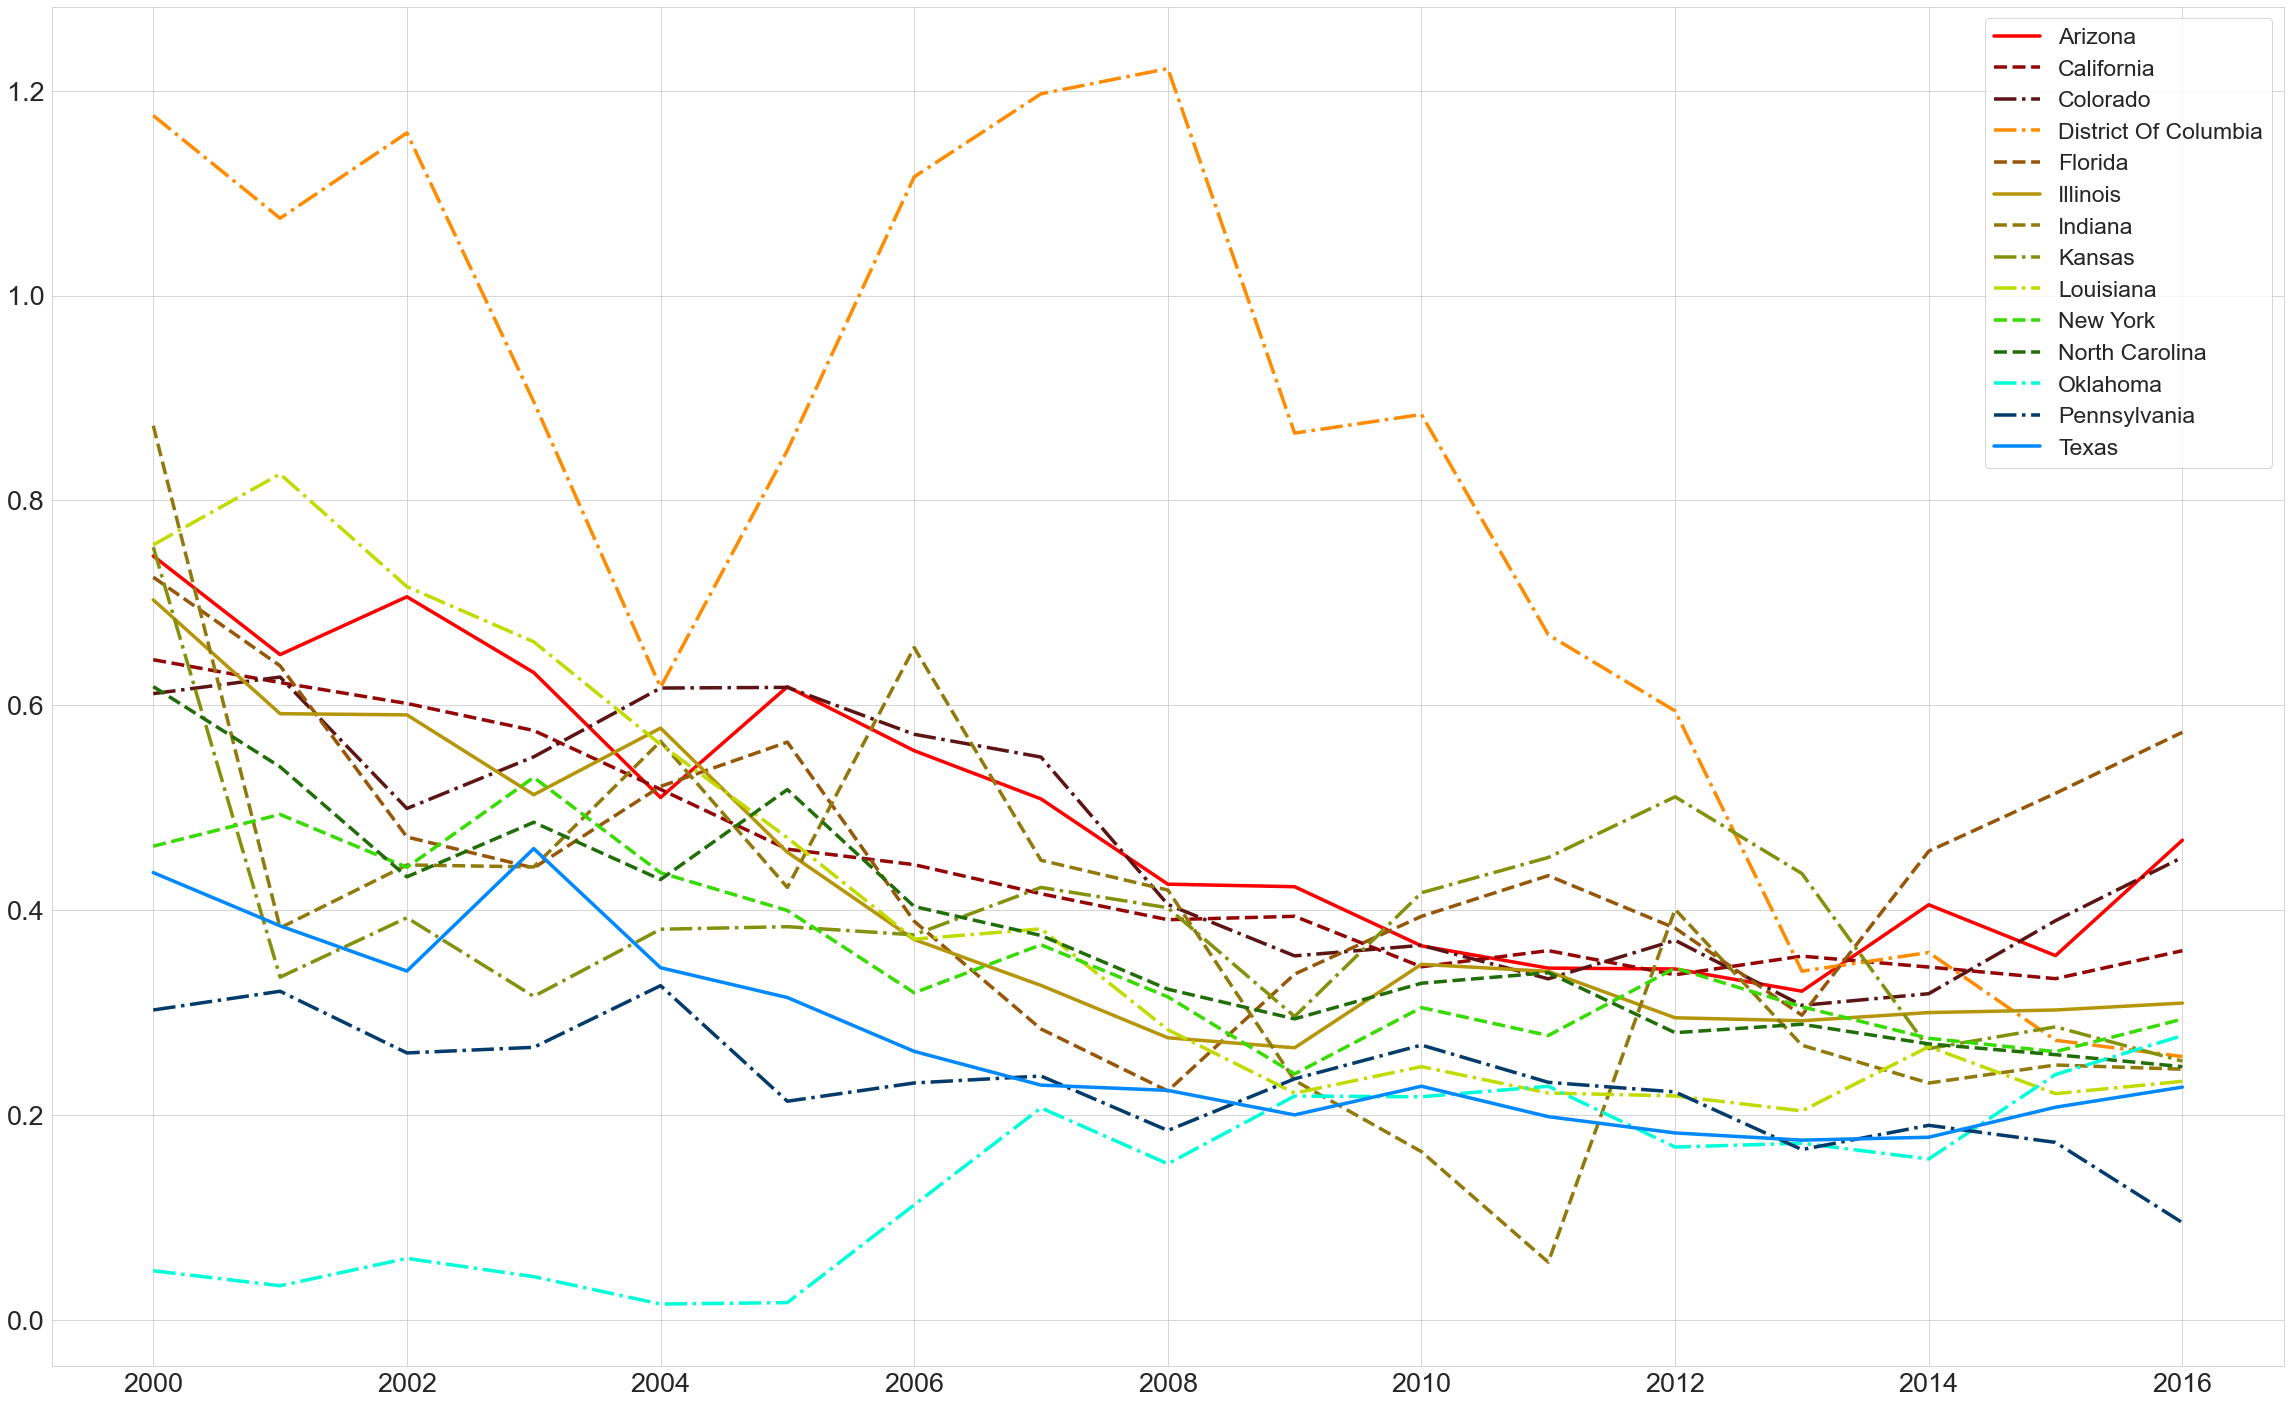

In [35]:
# CO
sns.set_style("whitegrid")
plot_colors = ['#ff0000', '#940606', '#5c1414', '#ff8c00', '#965709', '#b59509', '#91790c', '#84910c', '#c1db00', '#37db00', '#216e08', '#00ffd9', '#033b6b', '#0089ff']
plot_line_styles = ['-', '--','-.', '-.', '--', '-', '--','-.', '-.', '--', '--','-.', '-.', '-']
co_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)

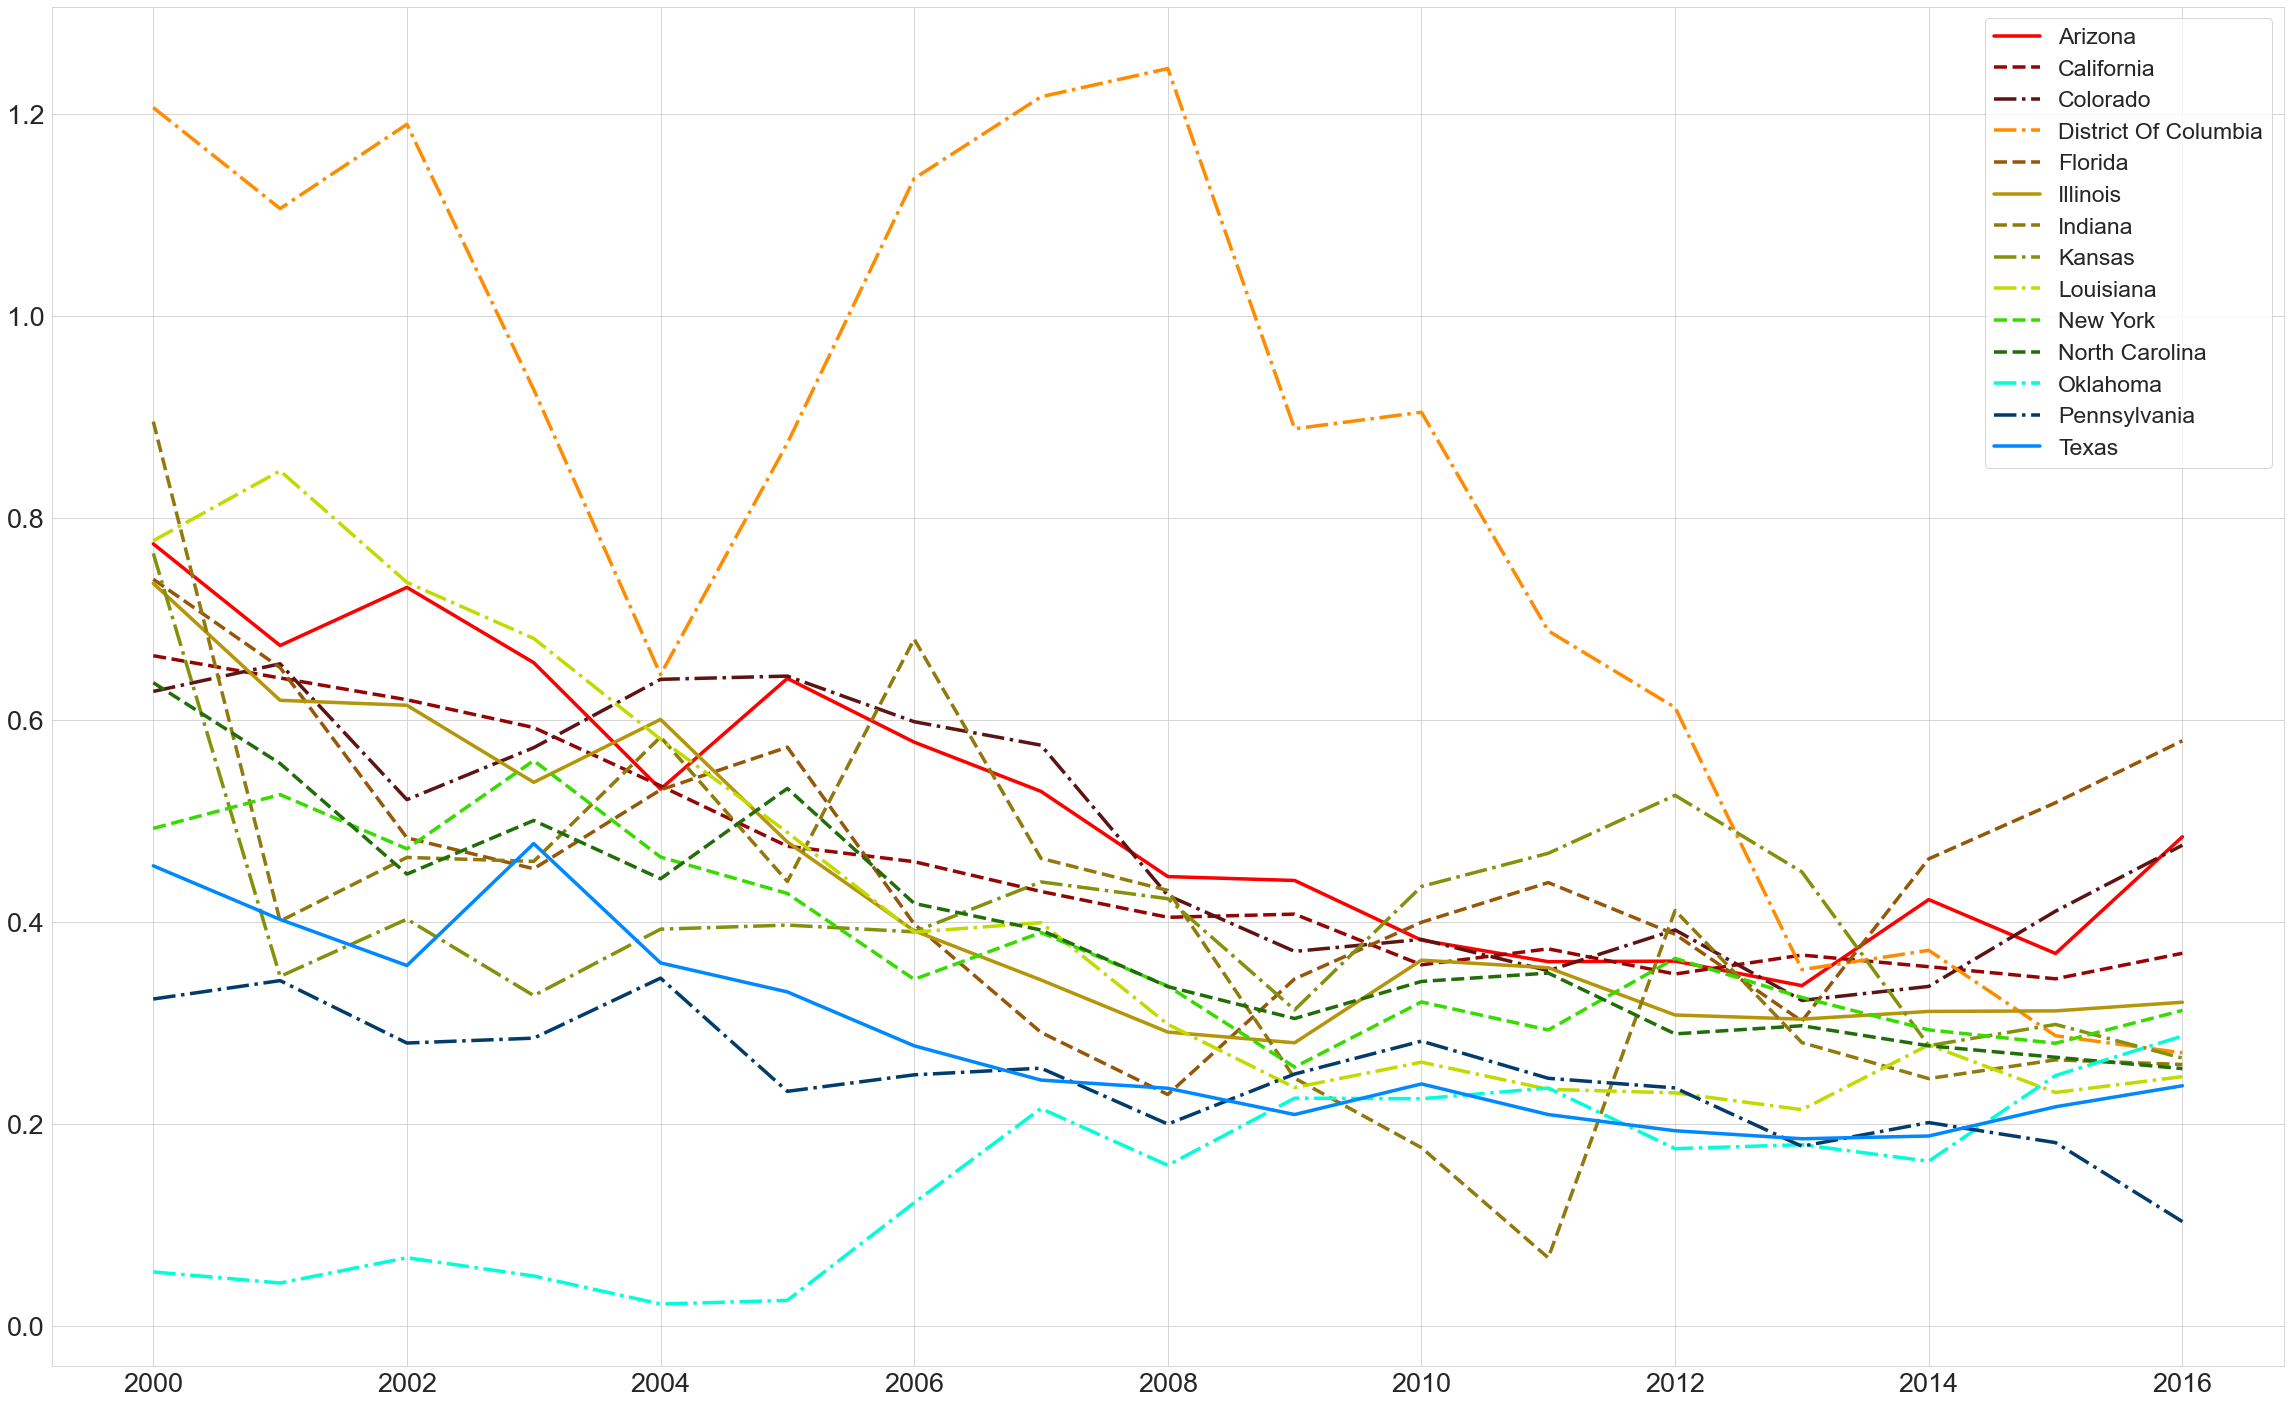

In [36]:
# Total toxic
sns.set_style("whitegrid")
plot_colors = ['#ff0000', '#940606', '#5c1414', '#ff8c00', '#965709', '#b59509', '#91790c', '#84910c', '#c1db00', '#37db00', '#216e08', '#00ffd9', '#033b6b', '#0089ff']
plot_line_styles = ['-', '--','-.', '-.', '--', '-', '--','-.', '-.', '--', '--','-.', '-.', '-']
total_df.plot(figsize=(40,25), color = plot_colors, linewidth=3.5, style = plot_line_styles)

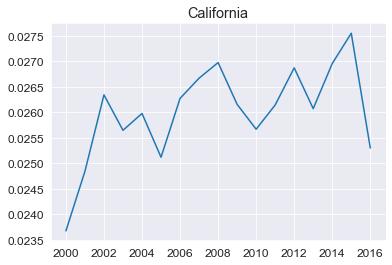

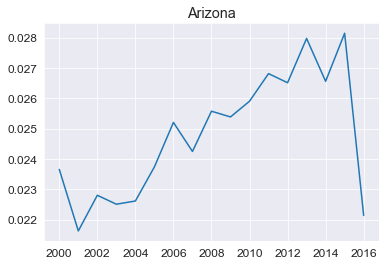

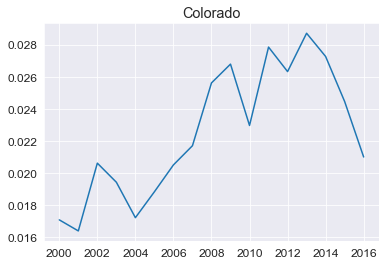

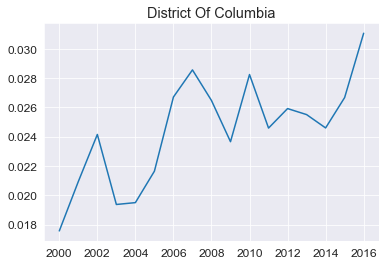

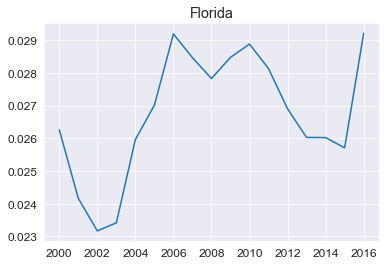

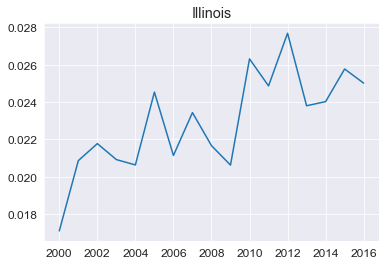

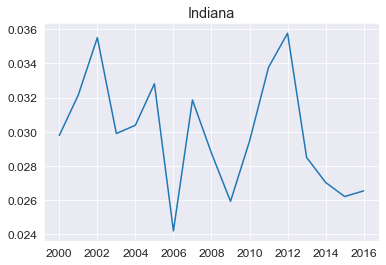

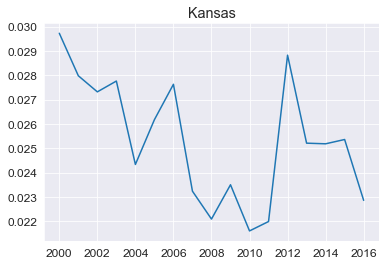

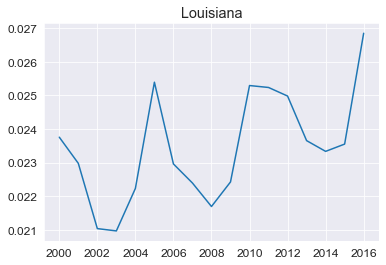

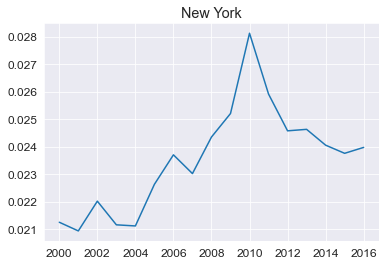

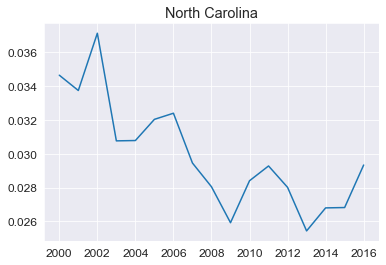

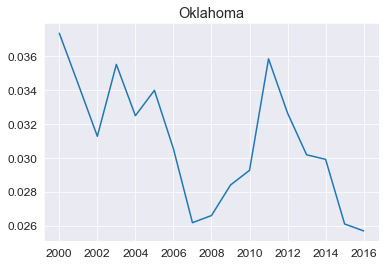

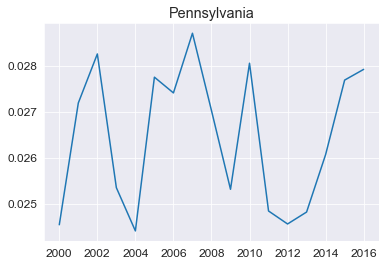

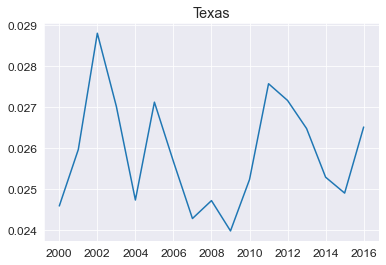

In [37]:
# individual o3 plots
plt.figure()
params = {'legend.fontsize': 23,
          'legend.handlelength': 2,
         'font.size' : 12}
plot.rcParams.update(params)
sns.set_style('darkgrid')
for i, col in enumerate(o3_df.columns):
    o3_df[col].plot(fig=plt.figure(i))
    plt.title(col)
plt.show()

In [79]:
df_list[0].groupby('State')[mean_cols].mean()

,NO2 Mean,O3 Mean,SO2 Mean,CO Mean,Total Mean
State,,,,,
Arizona,0.026488,0.023655,0.002303,0.745756,0.798202
California,0.017581,0.023675,0.001721,0.644488,0.687464
Colorado,0.014902,0.017066,0.002138,0.611388,0.645494
District Of Columbia,0.022726,0.017567,0.008138,1.175696,1.224127
Florida,0.012453,0.026261,0.001974,0.725072,0.765760
Illinois,0.026437,0.017105,0.006064,0.702893,0.752500
Indiana,0.015288,0.029782,0.007351,0.872974,0.925394
Kansas,0.009704,0.029726,0.000943,0.754412,0.794784
Kentucky,0.012672,0.028896,0.004781,0.177907,0.224256
